In [2]:
import pandas as pd
df= pd.read_csv("./data/FinalDataSet.csv")
df.columns

Index(['Year', 'Song Title', 'Local Lyrics Lines', 'Local Lyrics Single Line',
       'Translation', 'Translation Multi Line', 'Country', 'Composer',
       'Lyrics', 'Conductor', 'Contest', 'Semi-final', 'Semi Final Position',
       'Semi Final Poinst', 'Final Position', 'Final Points',
       'Other Version 1', 'Other Version 2', 'Other Version 3',
       'Other Version 4', 'Other Version 5', 'Other Version 6',
       'Other Version 7', 'Other Version 8', 'Other Version 9'],
      dtype='object')

In [3]:
# Populate the missing translation lyrics with the local lyrics where they are missing
df['Translation Multi Line'].fillna(df['Local Lyrics Lines'],inplace=True)
# Populate the missing translation lyrics with the local lyrics where they are missing
df['Translation'].fillna(df['Local Lyrics Single Line'],inplace=True)

In [4]:
#Check its all lyrics are populated
df[pd.isnull(df['Translation'])]

,Year,Song Title,Local Lyrics Lines,Local Lyrics Single Line,Translation,Translation Multi Line,Country,Composer,Lyrics,Conductor,...,Final Points,Other Version 1,Other Version 2,Other Version 3,Other Version 4,Other Version 5,Other Version 6,Other Version 7,Other Version 8,Other Version 9


In [5]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkenn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#Initial Review of the word freq
top_N = 10000
#if not necessary all lower
a = df['Translation Multi Line'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.head(4)

<FreqDist with 13100 samples and 414861 outcomes>


,Word,Frequency
0,",",23890
1,’,16707
2,i,14293
3,the,14257


In [7]:
#Setup the Stop words removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
stop_words = set(stopwords.words('english'))

In [16]:
#Add additional characters and words to exclude from the dataset
stop_words.update((";","Translation",")","(",".","’"    ))


#Remove all stop words
df['Removed Stop'] = df['Translation Multi Line'].apply(lambda x: ' '.join([item for item in x.split() if item not in (stop_words)]))
#Remove all Punch
df["Removed Punch"] = df['Removed Stop'].str.replace('[^\w\s]','')

#Set all to lower lowercase
a = df['Removed Punch'].str.lower().str.cat(sep=' ')

words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)


In [13]:
df['Removed Punch'].head(2)

0    Were gathered todaySometimes open door hope Th...
1    Who told hide behind veil Who told get way Don...
Name: Removed Punch, dtype: object

In [17]:
#Initial Review of the word freq
top_N = 10000


In [18]:
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])


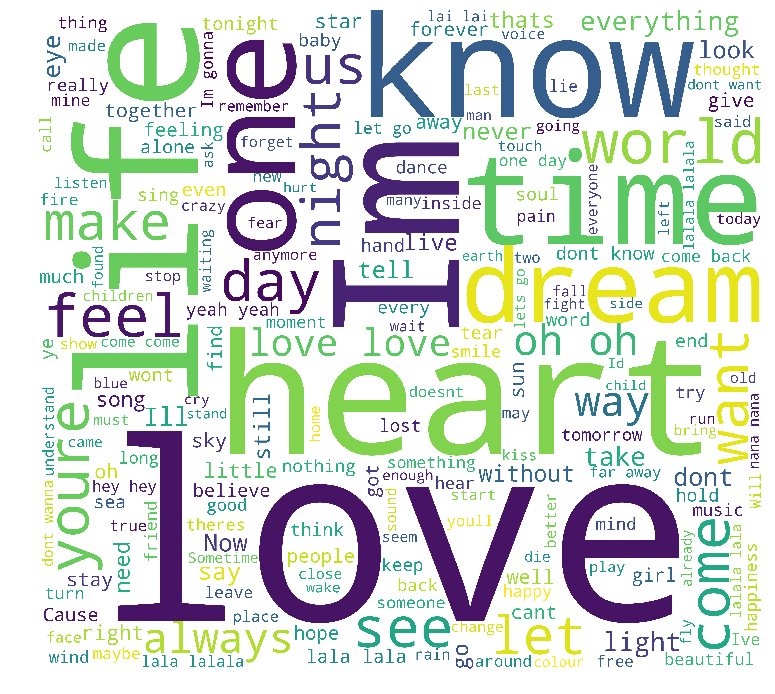

In [19]:
# Word Cloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=5500,
                      height=5000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

#Draw a word cloud to look nice at this point
wordcloud_draw(df['Removed Punch'],'white')

NameError: name 'df' is not defined